アンサンブル用シート

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')

In [7]:
average_result = []
average_result = pd.DataFrame(average_result)

GBDT_result = pd.read_csv('../data/result_data/GBDT_cv_result.csv')
DART_result = pd.read_csv('../data/result_data/DART_cv_result.csv')
GOSS_result = pd.read_csv('../data/result_data/GOSS_cv_result.csv')
XGB_result = pd.read_csv('../data/result_data/XGB_cv_result.csv')
CatBoost_result = pd.read_csv('../data/result_data/CatBoost_cv_result.csv')

average_result = (GBDT_result['0'] + DART_result['0']+ GOSS_result['0'] + XGB_result['0'])/4
average_result.reset_index()

,index,0
0,0,132061.784412
1,1,121859.327241
2,2,77378.202275
3,3,58452.929171
4,4,108009.046199
...,...,...
31257,31257,108897.161747
31258,31258,100119.004969
31259,31259,176036.545979
31260,31260,259062.247480


In [8]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
average_result = pd.concat([id, average_result],axis=1)
average_result.to_csv('../data/result_data/average_result.csv',index=False)

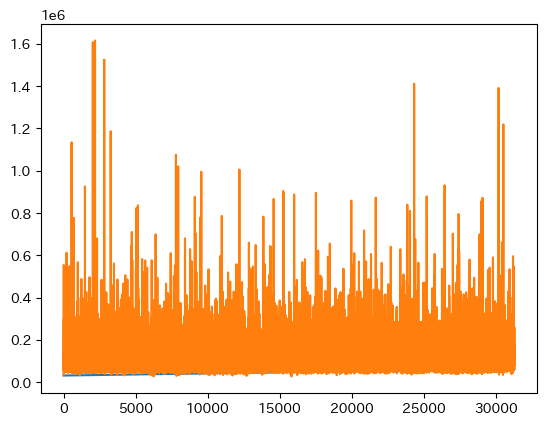

In [9]:
plt.plot(average_result)

In [5]:
average_result.corr()

,id,0
id,1.000000,0.004537
0,0.004537,1.000000


In [10]:
corr = pd.concat([GBDT_result['0'], DART_result['0'], GOSS_result['0'], XGB_result['0'], CatBoost_result['0']], axis=1)
corr.corr()

,0,0,0,0,0
0,1.000000,0.993178,0.991985,0.984796,0.977434
0,0.993178,1.000000,0.990150,0.986120,0.975828
0,0.991985,0.990150,1.000000,0.989454,0.983200
0,0.984796,0.986120,0.989454,1.000000,0.981220
0,0.977434,0.975828,0.983200,0.981220,1.000000
